# Web Mining and Applied NLP (44-620)

## Final Project: Article Summary

### Student Name: Ashley Mersman


#### Import necessary libraries/modules

In [1]:
from collections import Counter
import pickle
import requests
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list


Package                       Version
----------------------------- ---------
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.2.1
appnope                       0.1.2
appscript                     1.1.2
argh                          0.26.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
asgiref                       3.7.2
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.5.6
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
backports.zon

#### Store text from article (https://www.cnn.com/2023/06/24/tech/artificial-intelligence-generative-ai-explained/index.html) and store the html in a file (.pkl). 

In [2]:
import requests 
#Scrape data from website
response = requests.get("https://www.cnn.com/2023/06/24/tech/artificial-intelligence-generative-ai-explained/index.html")




In [3]:
#save text and print from scraped data
text = response.text
#Save text as a pickle file
with open('article_text.pkl', 'wb') as file:
    pickle.dump(text, file)


#### Read in the file and get the text. Perform sentitment analysis on the article. 

In [4]:
# Read the file contents 
with open('article_text.pkl', 'rb') as f:
    article_text = pickle.load(f)

# Parse HTML content 
parser = 'html.parser'
soup = BeautifulSoup(article_text, parser)

article_element = soup.find('article')

# Print text
print(article_element.get_text())














Tom Werner/Stone RF/Getty Images








CNN
         — 
    


      Business executives keep talking about it. Teachers are struggling with what to do about it. And artists like Drake seem angry about it. 
  

      Love it or hate it, everyone is paying attention to artificial intelligence right now. Almost overnight, a new crop of AI tools has found its way into products used by billions of people, changing the way we work, shop, create and communicate with each other.
  

      AI advocates tout the technology’s potential to supercharge our productivity, creating a new era of better jobs, better education and better treatments for diseases. AI skeptics have raised concerns about the technology’s potential to disrupt jobs, mislead people and possibly bring about the end of humanity as we know it. Confusingly, some execs in Silicon Valley seem to hold both sets of views at once. 
  

      What’s clear, however, is that AI is not going away, but it is changing very fast

##### Sentiment Analysis - Polarity Score using Spacy pipeline

In [5]:
nlp = spacy.load('en_core_web_sm')
# why not, let's add some fun sentiment analysis, because we can
nlp.add_pipe('spacytextblob')
doc = nlp(article_element.get_text())
print(f'The polarity score for the article is: {round(doc._.polarity, 4)}')

The polarity score for the article is: 0.0764


##### Number of sentences in the article. 

In [6]:
sentences = list(doc.sents)
print(f'There are {len(sentences)} sentences in the article.')

There are 85 sentences in the article.


##### Number of tokens in the article.


In [7]:
count = 0
for token in doc:
    count += 1
print(f'There are a total of {count} tokens.')
    
    

There are a total of 1945 tokens.


###### We need to remove white spaces, punctuation, and stop words and recalculate. 

In [8]:
def tokens_of_interest(token):
    return not(token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token.text.lower() for token in doc if tokens_of_interest(token)]
print(f'There are {len(interesting_tokens)} tokens that we care about in the document.')

There are 877 tokens that we care about in the document.


##### Use trained Spacy pipeline to determine the top 5 most frequent tokens in the document. 

In [9]:
#Get token frequencies
token_count = Counter(map(str,interesting_tokens))
token_top_10 = token_count.most_common(10)



In [10]:
print('Token                 Frequency')
for token, count in token_top_10:
    print(f'{token:<13}{count:>11}')

Token                 Frequency
ai                    46
chatgpt               14
technology            12
tools                 11
data                   9
generative             9
images                 6
people                 6
services               6
artificial             5


##### Plot the token score.
* Token scores are a quantification of how many interesting tokens are used in a sentence versus all tokens (except punctuation and white space). 

In [11]:
def score_sentence_by_token(sentence, interesting_token):
    #calculate sentence length
    def sentence_length(sentence):
        count = 0
        for token in sentence:
            if not(token.is_space or token.is_punct):
                count += 1
        return count
    #count number of interesting tokens in the sentence
    interesting_token_count = len(([token.text.lower() for token in sentence if token.text.lower() in interesting_tokens]))
    #determine the score by dividing
    score = interesting_token_count/sentence_length(sentence)
    #return the score from above
    return score

#create a list of all sentences in the doc
sentences = list(doc.sents)



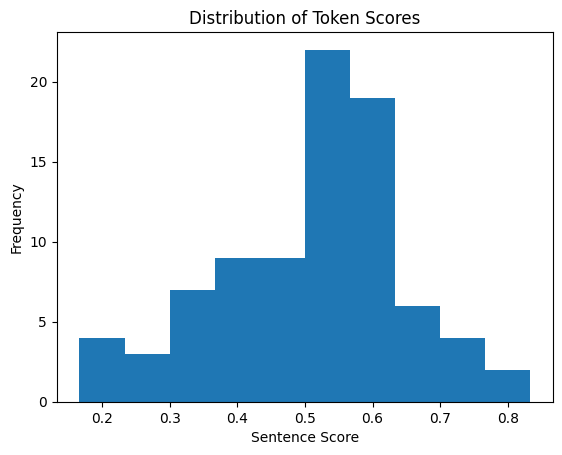

<Figure size 640x480 with 0 Axes>

In [12]:
#scores by token
token_scores = []
for sentence in list(doc.sents):
    score = score_sentence_by_token(sentence, interesting_tokens)
    token_scores.append(score)
    
#Distribution Plot
plt.hist(token_scores)
plt.title('Distribution of Token Scores')
plt.xlabel('Sentence Score')
plt.ylabel('Frequency')
plt.show()
plt.clf()

##### Use trained Spacy pipeline to determine the top 5 most frequent lemma in the document. 

In [13]:
interesting_lemmas = [token.lemma_.lower() for token in doc if tokens_of_interest(token)]
lemma_count = Counter(map(str,interesting_lemmas))
top_10_lemma = lemma_count.most_common(10)
print('Token            Frequency')
for lemma, count in top_10_lemma:
    print(f'{lemma:<10}{count:>9}')

Token            Frequency
ai               46
tool             14
chatgpt          14
technology       12
datum             9
generative        9
work              7
create            7
job               7
help              7


##### Plot the lemma score.
* Lemma scores are a quantification of how many interesting tokens are used in a sentence versus all tokens (except punctuation and white space). 

In [14]:
def score_sentence_by_lemma(sentence, interesting_lemma):
    #calculate sentence length
    def sentence_length(sentence):
        count = 0
        for token in sentence:
            if not(token.is_space or token.is_punct):
                count += 1
        return count
    #count number of interesting tokens in the sentence
    interesting_lemma_count = len(([token.lemma_.lower() for token in sentence if token.lemma_.lower() in interesting_lemmas]))
    score = interesting_lemma_count/sentence_length(sentence)
    return score


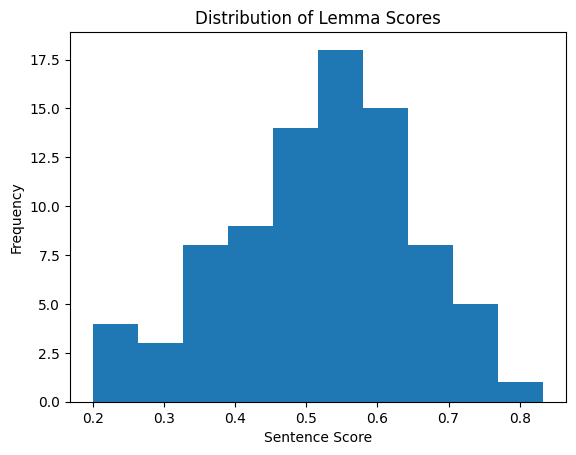

<Figure size 640x480 with 0 Axes>

In [15]:
#scores by lemma
lemma_scores = []
for sentence in list(doc.sents):
    score = score_sentence_by_lemma(sentence, interesting_tokens)
    lemma_scores.append(score)
    
#Distribution Plot
plt.hist(lemma_scores)
plt.title('Distribution of Lemma Scores')
plt.xlabel('Sentence Score')
plt.ylabel('Frequency')
plt.show()
plt.clf()

###### Determine a cut off value for the sentence scores (for tokens and lemmas). Use the value to create a summary and determine a polarity score for the summaries and compare.

In [16]:
cut_off = 0.65

In [17]:
#scores by lemma
token_sent_scores = list()
for sentence in list(doc.sents):
    score = score_sentence_by_token(sentence, interesting_tokens)
    if score >= cut_off:
        token_sent_scores.append(sentence.text.strip())

In [18]:
print(f'The length of the summary with a cut-off of {cut_off} is {len(token_sent_scores)} sentences, based on token score.')

The length of the summary with a cut-off of 0.65 is 9 sentences, based on token score.


In [19]:
token_summary = ' '.join(token_sent_scores)

In [20]:
print(token_summary)

Tom Werner/Stone RF/Getty Images








CNN
         — 
    


      Business executives keep talking about it. AI advocates tout the technology’s potential to supercharge our productivity, creating a new era of better jobs, better education and better treatments for diseases. The short answer: ChatGPT. How exactly does generative AI work? Generative AI enables tools to create written work, images and even audio in response to prompts from users. Investor fascination with AI has helped push Wall Street back into a bull market, despite lingering economic uncertainty. Companies will likely need new workers to help them implement and manage AI tools. Alphabet CEO Sundar Pichai, left, and OpenAI CEO Sam Altman arrive to the White House for a meeting with Vice President Kamala Harris on artificial intelligence, Thursday, May 4, 2023, in Washington. Evan Vucci/AP



    Is AI dangerous?


In [21]:

nlp = spacy.load('en_core_web_sm')
# why not, let's add some fun sentiment analysis, because we can
nlp.add_pipe('spacytextblob')
token_summary = nlp(token_summary)
print(f'The polarity score for the article is: {round(token_summary._.polarity, 4)}')

The polarity score for the article is: 0.0682


In [22]:
#scores by lemma
lemma_sent_scores = list()
for sentence in list(doc.sents):
    score = score_sentence_by_lemma(sentence, interesting_tokens)
    if score >= cut_off:
        lemma_sent_scores.append(sentence.text.strip())

In [23]:
print(f'The length of the summary with a cut-off of {cut_off} is {len(lemma_sent_scores)} sentences, based on lemma score.')

The length of the summary with a cut-off of 0.65 is 12 sentences, based on lemma score.


In [24]:
lemma_summary = ' '.join(lemma_sent_scores)

In [25]:
print(lemma_summary)

Tom Werner/Stone RF/Getty Images








CNN
         — 
    


      Business executives keep talking about it. AI advocates tout the technology’s potential to supercharge our productivity, creating a new era of better jobs, better education and better treatments for diseases. The short answer: ChatGPT. The ChatGPT app is seen running on an iPhone in this photo illustration

Jaap Arriens/NurPhoto/Getty Images



      Microsoft and Google have each introduced features powered by generative AI, the technology underpinning ChatGPT, into their most widely used productivity tools. How exactly does generative AI work? Generative AI enables tools to create written work, images and even audio in response to prompts from users. Investor fascination with AI has helped push Wall Street back into a bull market, despite lingering economic uncertainty. Companies will likely need new workers to help them implement and manage AI tools. Data entry clerks and executive secretaries are expected to see 

In [26]:

nlp = spacy.load('en_core_web_sm')
# why not, let's add some fun sentiment analysis, because we can
nlp.add_pipe('spacytextblob')
lemma_summary = nlp(lemma_summary)
print(f'The polarity score for the summary using a cut off of {cut_off} for the lemma score is: {round(lemma_summary._.polarity, 4)}')

The polarity score for the summary using a cut off of 0.65 for the lemma score is: 0.0696


In [27]:
print(f'The polarity score for the article is: {round(doc._.polarity, 4)}')

The polarity score for the article is: 0.0764


In [29]:
print(f'The polarity score for the article is: {round(doc._.polarity, 4)}')
print(f'The polarity score for the sumary using a cut off of {cut_off} for token scores is: {round(token_summary._.polarity, 4)}')
print(f'The polarity score for the summary using a cut off of {cut_off} for the lemma score is: {round(lemma_summary._.polarity, 4)}')

The polarity score for the article is: 0.0764
The polarity score for the sumary using a cut off of 0.65 for token scores is: 0.0682
The polarity score for the summary using a cut off of 0.65 for the lemma score is: 0.0696


##### Using a cut off of 0.65 gave the best summaries. The summary is a bit longer but has a polarity score closer to the overall polarity of the article. The article is an informative article that has a neutral tone educating the reader on AI and ChatGPT. Lemmitization reduces the tokens to it's base or root and because of that accounts for slight differences in tense or pluralization. 